# Importing libraries

In [1]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
import seaborn as sns

import random
from sklearn.preprocessing import MultiLabelBinarizer

%matplotlib inline

Show image

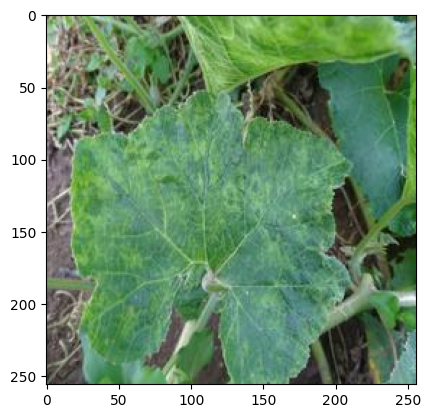

In [4]:
img = cv2.imread('DSC06089.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure()
plt.imshow(img)

In [6]:
def show_image(image, title='Image', cmap_type='gray'): 
  plt.imshow(image, cmap=cmap_type)
  plt.title(title)
  plt.axis('off')
  plt.show()

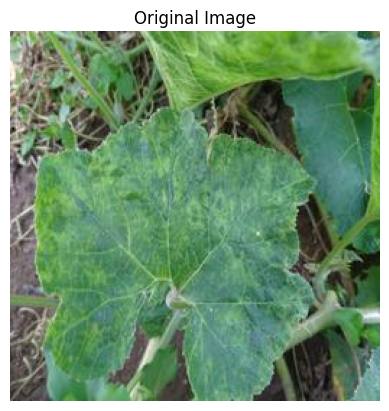

In [7]:
leaf_image = cv2.imread('DSC06089.jpg')
leaf_image = cv2.cvtColor(leaf_image, cv2.COLOR_BGR2RGB)

show_image(leaf_image, 'Original Image')

Histogram

<function matplotlib.pyplot.show(close=None, block=None)>

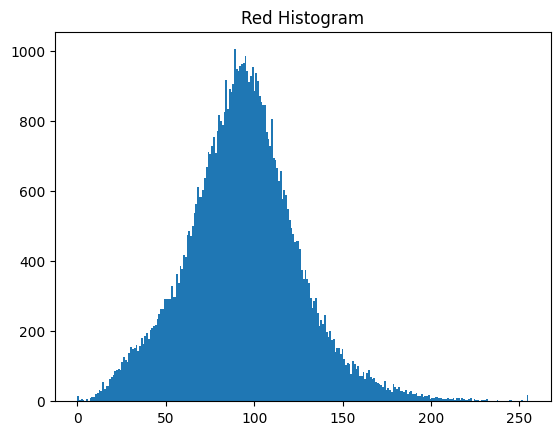

In [8]:
red = leaf_image[:, :, 0] # using the red channel of the rocket image.

plt.hist(red.ravel(), bins=256) # plot its histogram with 256 bins, the number of possible values of a pixel.
plt.title('Red Histogram')
plt.show

Gray Scale image

New Image Shape (256, 256)


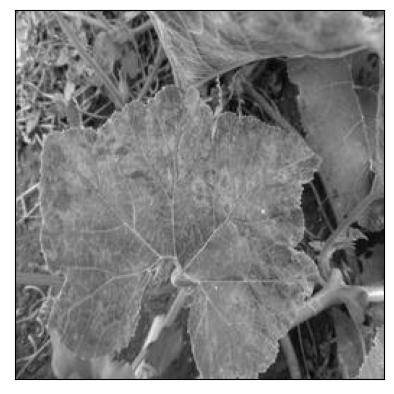

In [9]:
grayimg = cv2.cvtColor(leaf_image,cv2.COLOR_BGR2GRAY)

plt.imshow(grayimg,cmap='gray') #cmap has been used as matplotlib uses some default colormap to plot grayscale images
plt.xticks([]) #To get rid of the x-ticks and y-ticks on the image axis
plt.yticks([])
print('New Image Shape',grayimg.shape)

In [10]:
#Finding optimal threshold
from skimage.filters import threshold_otsu
thresh_val = threshold_otsu(grayimg)
print('The optimal seperation value is',thresh_val)

The optimal seperation value is 102


Applying Edge Detection Techniques on The Image¶


In [11]:
def plot_comparison(original, filtered, title_filtered):
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 6), sharex=True, sharey=True)
  ax1.imshow(original, cmap=plt.cm.gray) 
  ax1.set_title('original') 
  ax1.axis('off')
  ax2.imshow(filtered, cmap=plt.cm.gray) 
  ax2.set_title(title_filtered) 
  ax2.axis('off')

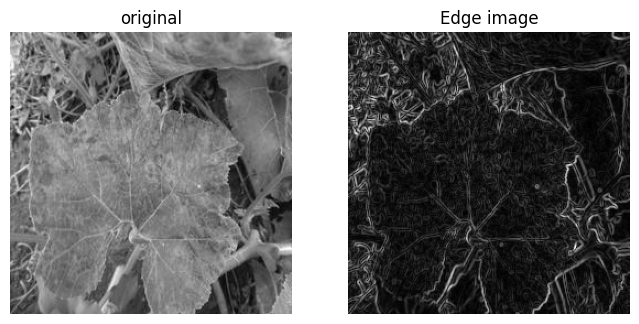

In [12]:
# Sobel Operator
from skimage.filters import sobel

edge_image = sobel(grayimg) # apply the filter

plot_comparison(grayimg, edge_image, 'Edge image')

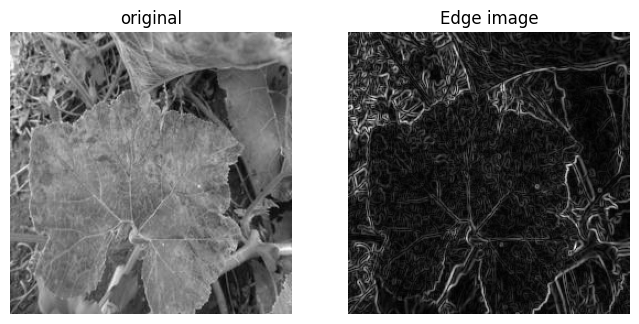

In [13]:
# Prewitt Operator
from skimage.filters import prewitt

edge_image = prewitt(grayimg) # apply the filter

plot_comparison(grayimg, edge_image, 'Edge image')

Contrast Enhancement by Histogram equalization

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\_shared\utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


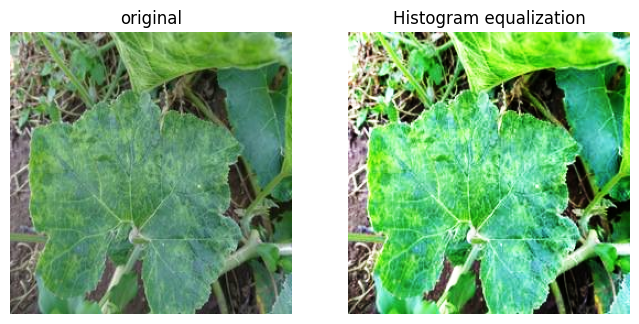

In [14]:
from skimage import exposure
equalized_leaf_image = exposure.equalize_hist(leaf_image)

plot_comparison(leaf_image, equalized_leaf_image, 'Histogram equalization')

ADAPTIVE HISTOGRAM EQUALISATION

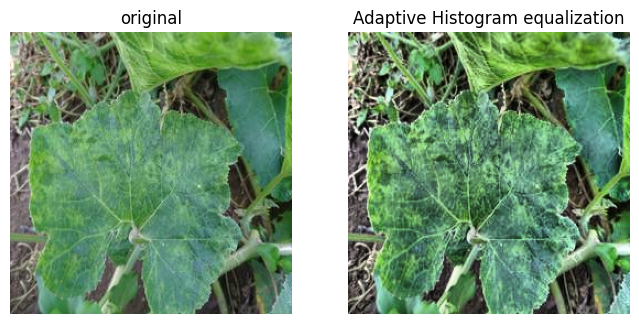

In [15]:
adapthits_leag_image = exposure.equalize_adapthist(leaf_image)

plot_comparison(leaf_image, adapthits_leag_image, 'Adaptive Histogram equalization')
